In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import helpers

from sklearn.impute import SimpleImputer

np.random.seed(helpers.random_seed)

## 4. Feature Imputation

In [2]:
initial_train_df = pd.read_csv(f'../data/categorized_train.csv', index_col=0)

Here we will use the simple median imputation of missing values. PDFs will be, of course, skewed.

In [3]:
# np.int64 is used here, because all the continuous features have floating type.
# I am well aware that int can also be used as a continuous type, but in this case all ints are 0/1 of one-hot encoding
categorical_cols = initial_train_df.select_dtypes(np.int64).columns.to_list()
continuous_cols = list(set(initial_train_df.columns.to_list()) - set(categorical_cols))
continuous_cols

['R_NH4',
 'R_PHAEO',
 'R_SIGMA',
 'R_O2',
 'R_Depth',
 'R_TEMP',
 'R_SIO3',
 'R_SVA',
 'Lon_Dec',
 'Lat_Dec',
 'R_SALINITY',
 'R_PO4',
 'R_DYNHT',
 'R_CHLA',
 'R_O2Sat',
 'R_NO3',
 'R_PRES',
 'R_NO2']

In [4]:
imputer = SimpleImputer(strategy='median')

imputed_train = imputer.fit_transform(initial_train_df[continuous_cols])

In [5]:
train_df = pd.DataFrame(imputed_train, index = initial_train_df.index, columns = continuous_cols)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370736 entries, 442244 to 320663
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R_NH4       370736 non-null  float64
 1   R_PHAEO     370736 non-null  float64
 2   R_SIGMA     370736 non-null  float64
 3   R_O2        370736 non-null  float64
 4   R_Depth     370736 non-null  float64
 5   R_TEMP      370736 non-null  float64
 6   R_SIO3      370736 non-null  float64
 7   R_SVA       370736 non-null  float64
 8   Lon_Dec     370736 non-null  float64
 9   Lat_Dec     370736 non-null  float64
 10  R_SALINITY  370736 non-null  float64
 11  R_PO4       370736 non-null  float64
 12  R_DYNHT     370736 non-null  float64
 13  R_CHLA      370736 non-null  float64
 14  R_O2Sat     370736 non-null  float64
 15  R_NO3       370736 non-null  float64
 16  R_PRES      370736 non-null  float64
 17  R_NO2       370736 non-null  float64
dtypes: float64(18)
memory usage: 53.7 MB


## Test Dataset

Apply the imputation algorithm trained on the train dataset to the test dataset.

In [6]:
initial_test_df = pd.read_csv(f'../data/categorized_test.csv', index_col=0)

In [7]:
initial_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158887 entries, 404948 to 309268
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   R_Depth                     158887 non-null  float64
 1   R_TEMP                      158887 non-null  float64
 2   R_SALINITY                  152176 non-null  float64
 3   R_SIGMA                     152175 non-null  float64
 4   R_SVA                       152176 non-null  float64
 5   R_DYNHT                     153248 non-null  float64
 6   R_O2                        120683 non-null  float64
 7   R_O2Sat                     116875 non-null  float64
 8   R_SIO3                      66375 non-null   float64
 9   R_PO4                       73763 non-null   float64
 10  R_NO3                       62896 non-null   float64
 11  R_NO2                       62750 non-null   float64
 12  R_NH4                       13226 non-null   float64
 13  R_CHLA        

In [8]:
imputed_test = imputer.transform(initial_test_df[continuous_cols])

In [9]:
test_df = pd.DataFrame(imputed_test, index = initial_test_df.index, columns = continuous_cols)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158887 entries, 404948 to 309268
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R_NH4       158887 non-null  float64
 1   R_PHAEO     158887 non-null  float64
 2   R_SIGMA     158887 non-null  float64
 3   R_O2        158887 non-null  float64
 4   R_Depth     158887 non-null  float64
 5   R_TEMP      158887 non-null  float64
 6   R_SIO3      158887 non-null  float64
 7   R_SVA       158887 non-null  float64
 8   Lon_Dec     158887 non-null  float64
 9   Lat_Dec     158887 non-null  float64
 10  R_SALINITY  158887 non-null  float64
 11  R_PO4       158887 non-null  float64
 12  R_DYNHT     158887 non-null  float64
 13  R_CHLA      158887 non-null  float64
 14  R_O2Sat     158887 non-null  float64
 15  R_NO3       158887 non-null  float64
 16  R_PRES      158887 non-null  float64
 17  R_NO2       158887 non-null  float64
dtypes: float64(18)
memory usage: 23.0 MB


## Saving the data

Merge the imputed values with the rest and save the imputed datasets and the imputer model itself for future uses.

In [10]:
final_train_df = pd.concat([train_df, initial_train_df[categorical_cols]], axis=1)
final_test_df = pd.concat([test_df, initial_test_df[categorical_cols]], axis=1)

In [11]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370736 entries, 442244 to 320663
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   R_NH4                       370736 non-null  float64
 1   R_PHAEO                     370736 non-null  float64
 2   R_SIGMA                     370736 non-null  float64
 3   R_O2                        370736 non-null  float64
 4   R_Depth                     370736 non-null  float64
 5   R_TEMP                      370736 non-null  float64
 6   R_SIO3                      370736 non-null  float64
 7   R_SVA                       370736 non-null  float64
 8   Lon_Dec                     370736 non-null  float64
 9   Lat_Dec                     370736 non-null  float64
 10  R_SALINITY                  370736 non-null  float64
 11  R_PO4                       370736 non-null  float64
 12  R_DYNHT                     370736 non-null  float64
 13  R_CHLA        

In [12]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158887 entries, 404948 to 309268
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   R_NH4                       158887 non-null  float64
 1   R_PHAEO                     158887 non-null  float64
 2   R_SIGMA                     158887 non-null  float64
 3   R_O2                        158887 non-null  float64
 4   R_Depth                     158887 non-null  float64
 5   R_TEMP                      158887 non-null  float64
 6   R_SIO3                      158887 non-null  float64
 7   R_SVA                       158887 non-null  float64
 8   Lon_Dec                     158887 non-null  float64
 9   Lat_Dec                     158887 non-null  float64
 10  R_SALINITY                  158887 non-null  float64
 11  R_PO4                       158887 non-null  float64
 12  R_DYNHT                     158887 non-null  float64
 13  R_CHLA        

In [13]:
final_train_df.to_csv(f'../data/post_impute_train.csv')
final_test_df.to_csv(f'../data/post_impute_test.csv')

In [14]:
joblib.dump(imputer, '../data/imputer.joblib')

['../data/imputer.joblib']

## Plotting data

#### The distributions of train imputations

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

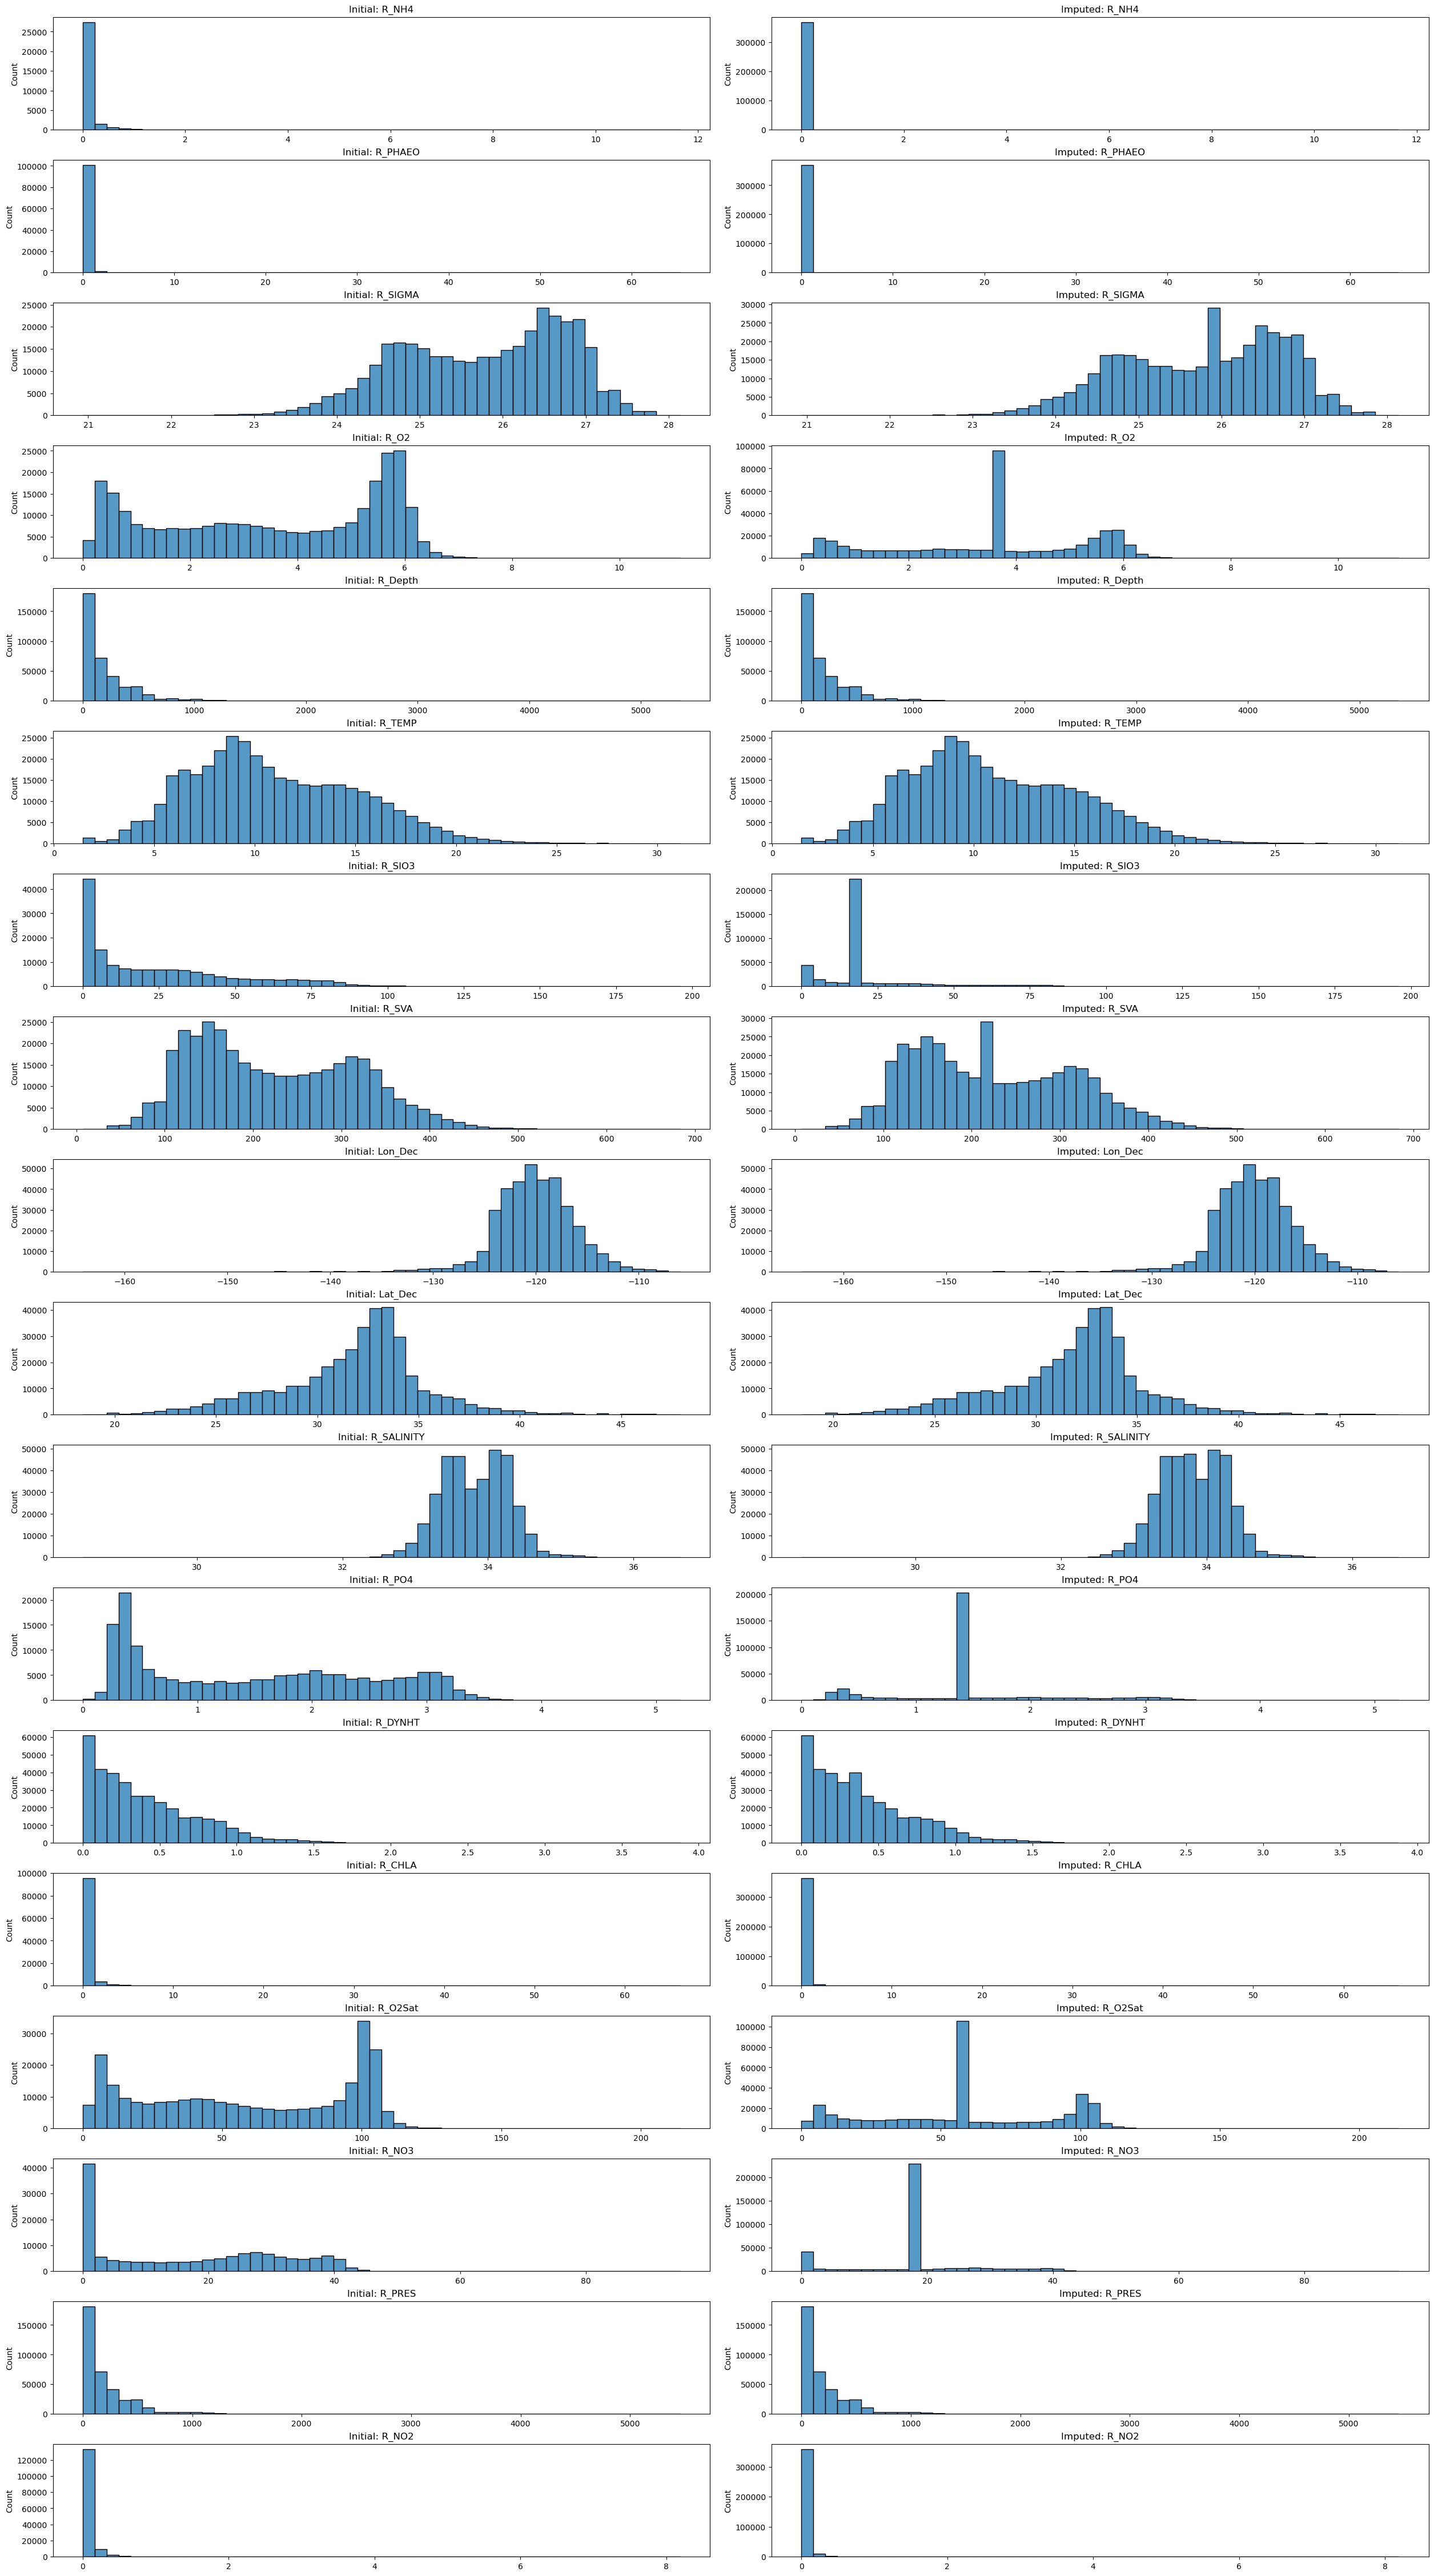

In [15]:
fig, axes = plt.subplots(nrows=train_df.shape[1], ncols=2, figsize=(25, 45), layout='constrained')
for col, ax in zip(train_df.columns, axes):
    sns.histplot(initial_train_df[col], ax=ax[0], bins=50).set(title=f'Initial: {col}', xlabel="")
    sns.histplot(train_df[col], ax=ax[1], bins=50).set(title=f'Imputed: {col}', xlabel="")
plt.show()

It seems the shapes of the PDFs skewed with median values, especially if the feature is missing a lot of values.

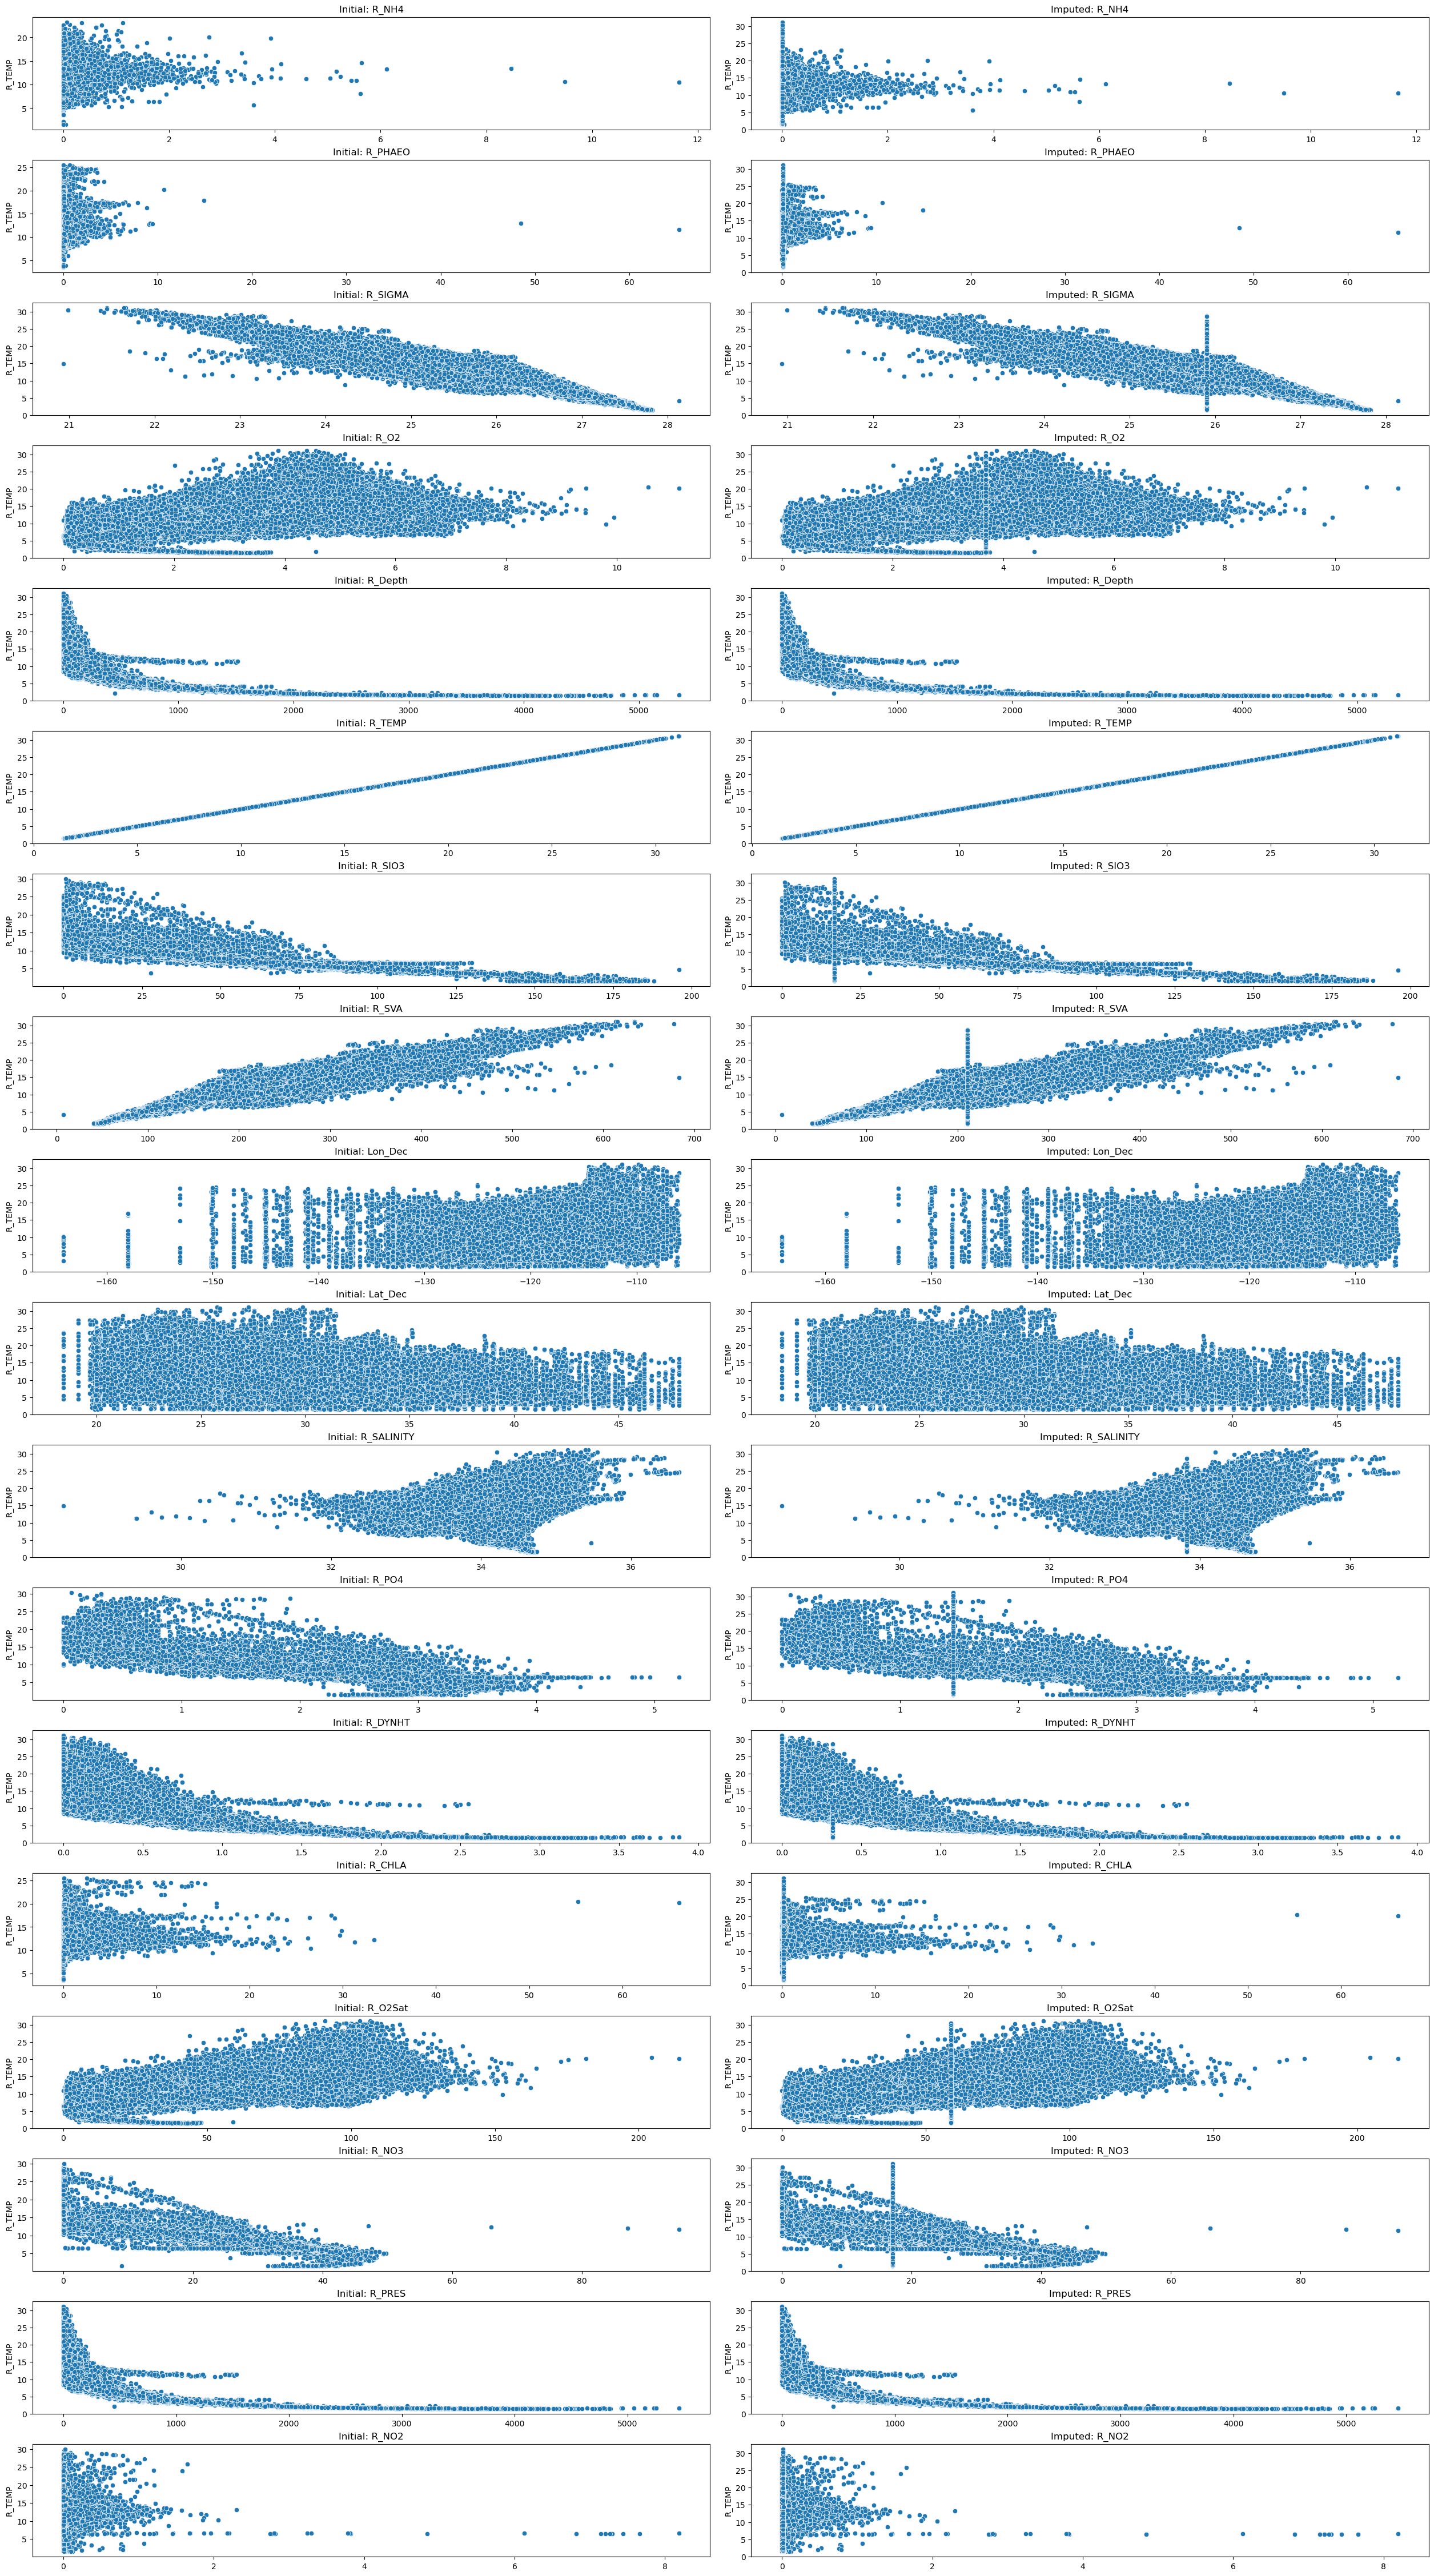

In [16]:
fig, axes = plt.subplots(nrows=train_df.shape[1], ncols=2, figsize=(25, 45), layout='constrained')
for col, ax in zip(train_df.columns, axes):
    sns.scatterplot(x=initial_train_df[col], y=initial_train_df[helpers.target_feature], ax=ax[0]).set(title=f'Initial: {col}', xlabel="")
    sns.scatterplot(x=train_df[col], y=train_df[helpers.target_feature], ax=ax[1]).set(title=f'Imputed: {col}', xlabel="")
plt.show()

#### The distributions of test imputations

c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

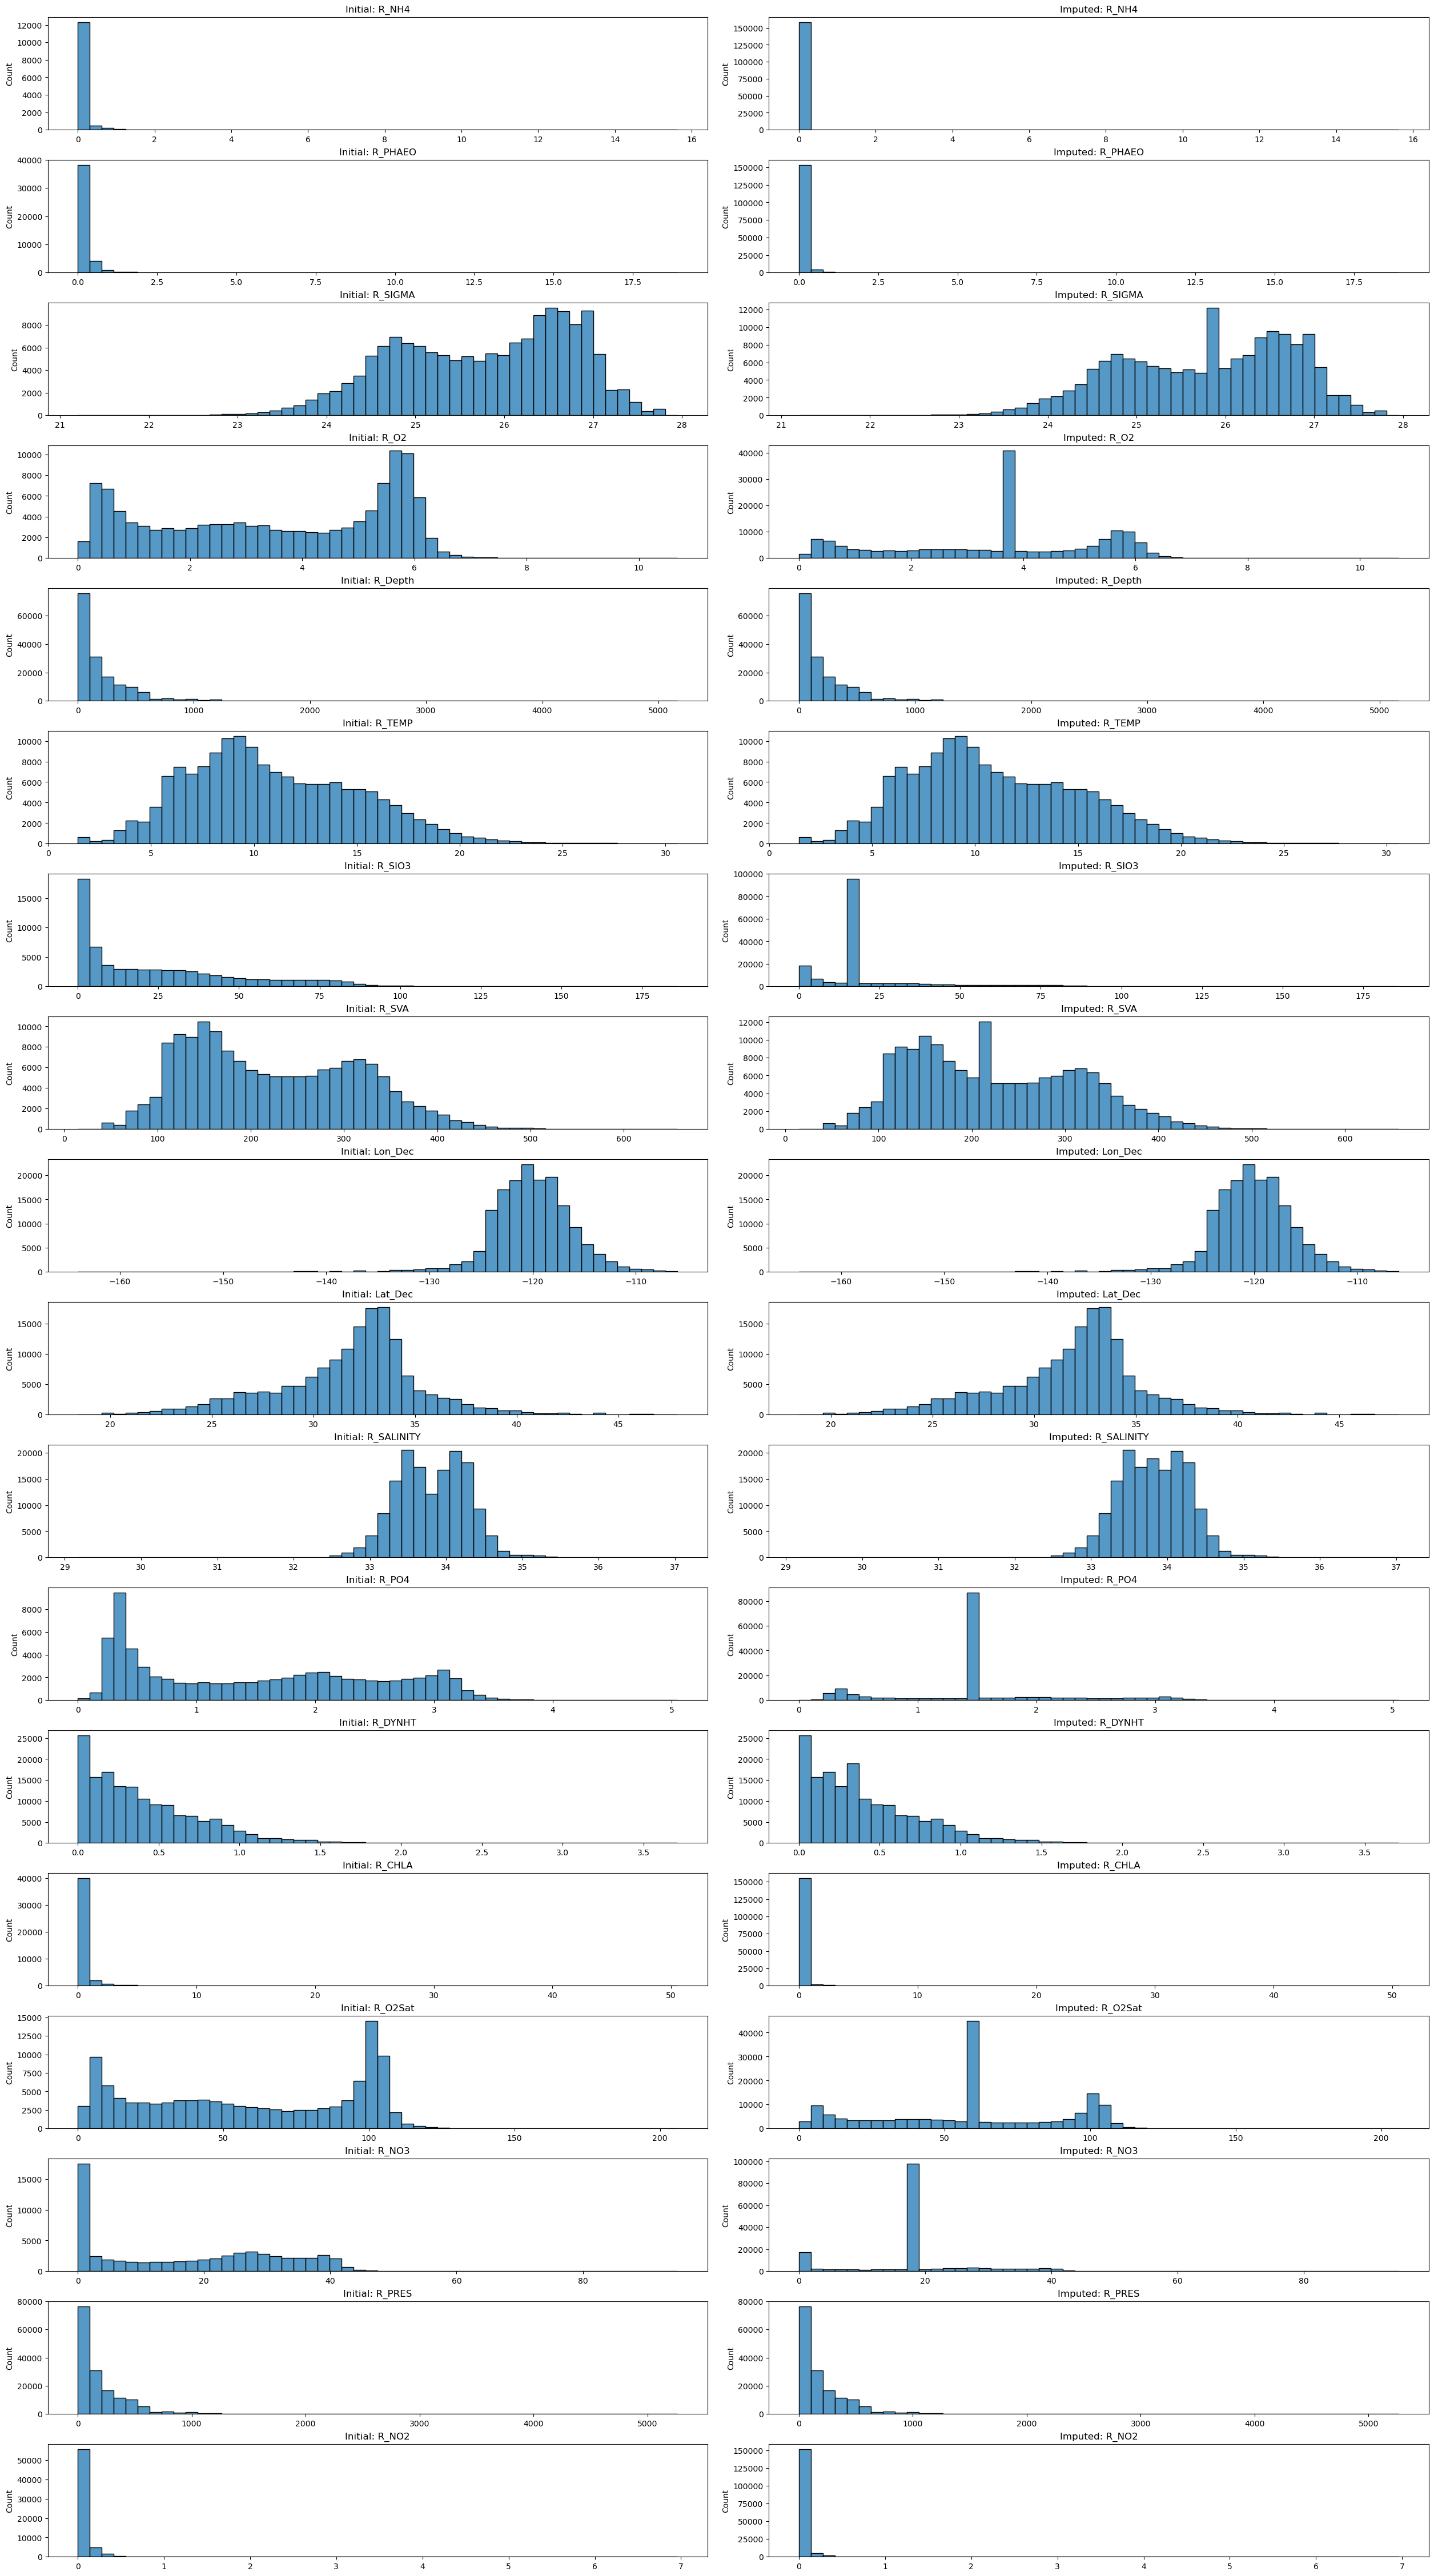

In [17]:
fig, axes = plt.subplots(nrows=test_df.shape[1], ncols=2, figsize=(25, 45), layout='constrained')
for col, ax in zip(test_df.columns, axes):
    sns.histplot(initial_test_df[col], ax=ax[0], bins=50).set(title=f'Initial: {col}', xlabel="")
    sns.histplot(test_df[col], ax=ax[1], bins=50).set(title=f'Imputed: {col}', xlabel="")
plt.show()

The imputation skews PDFs as well, unfortunately.

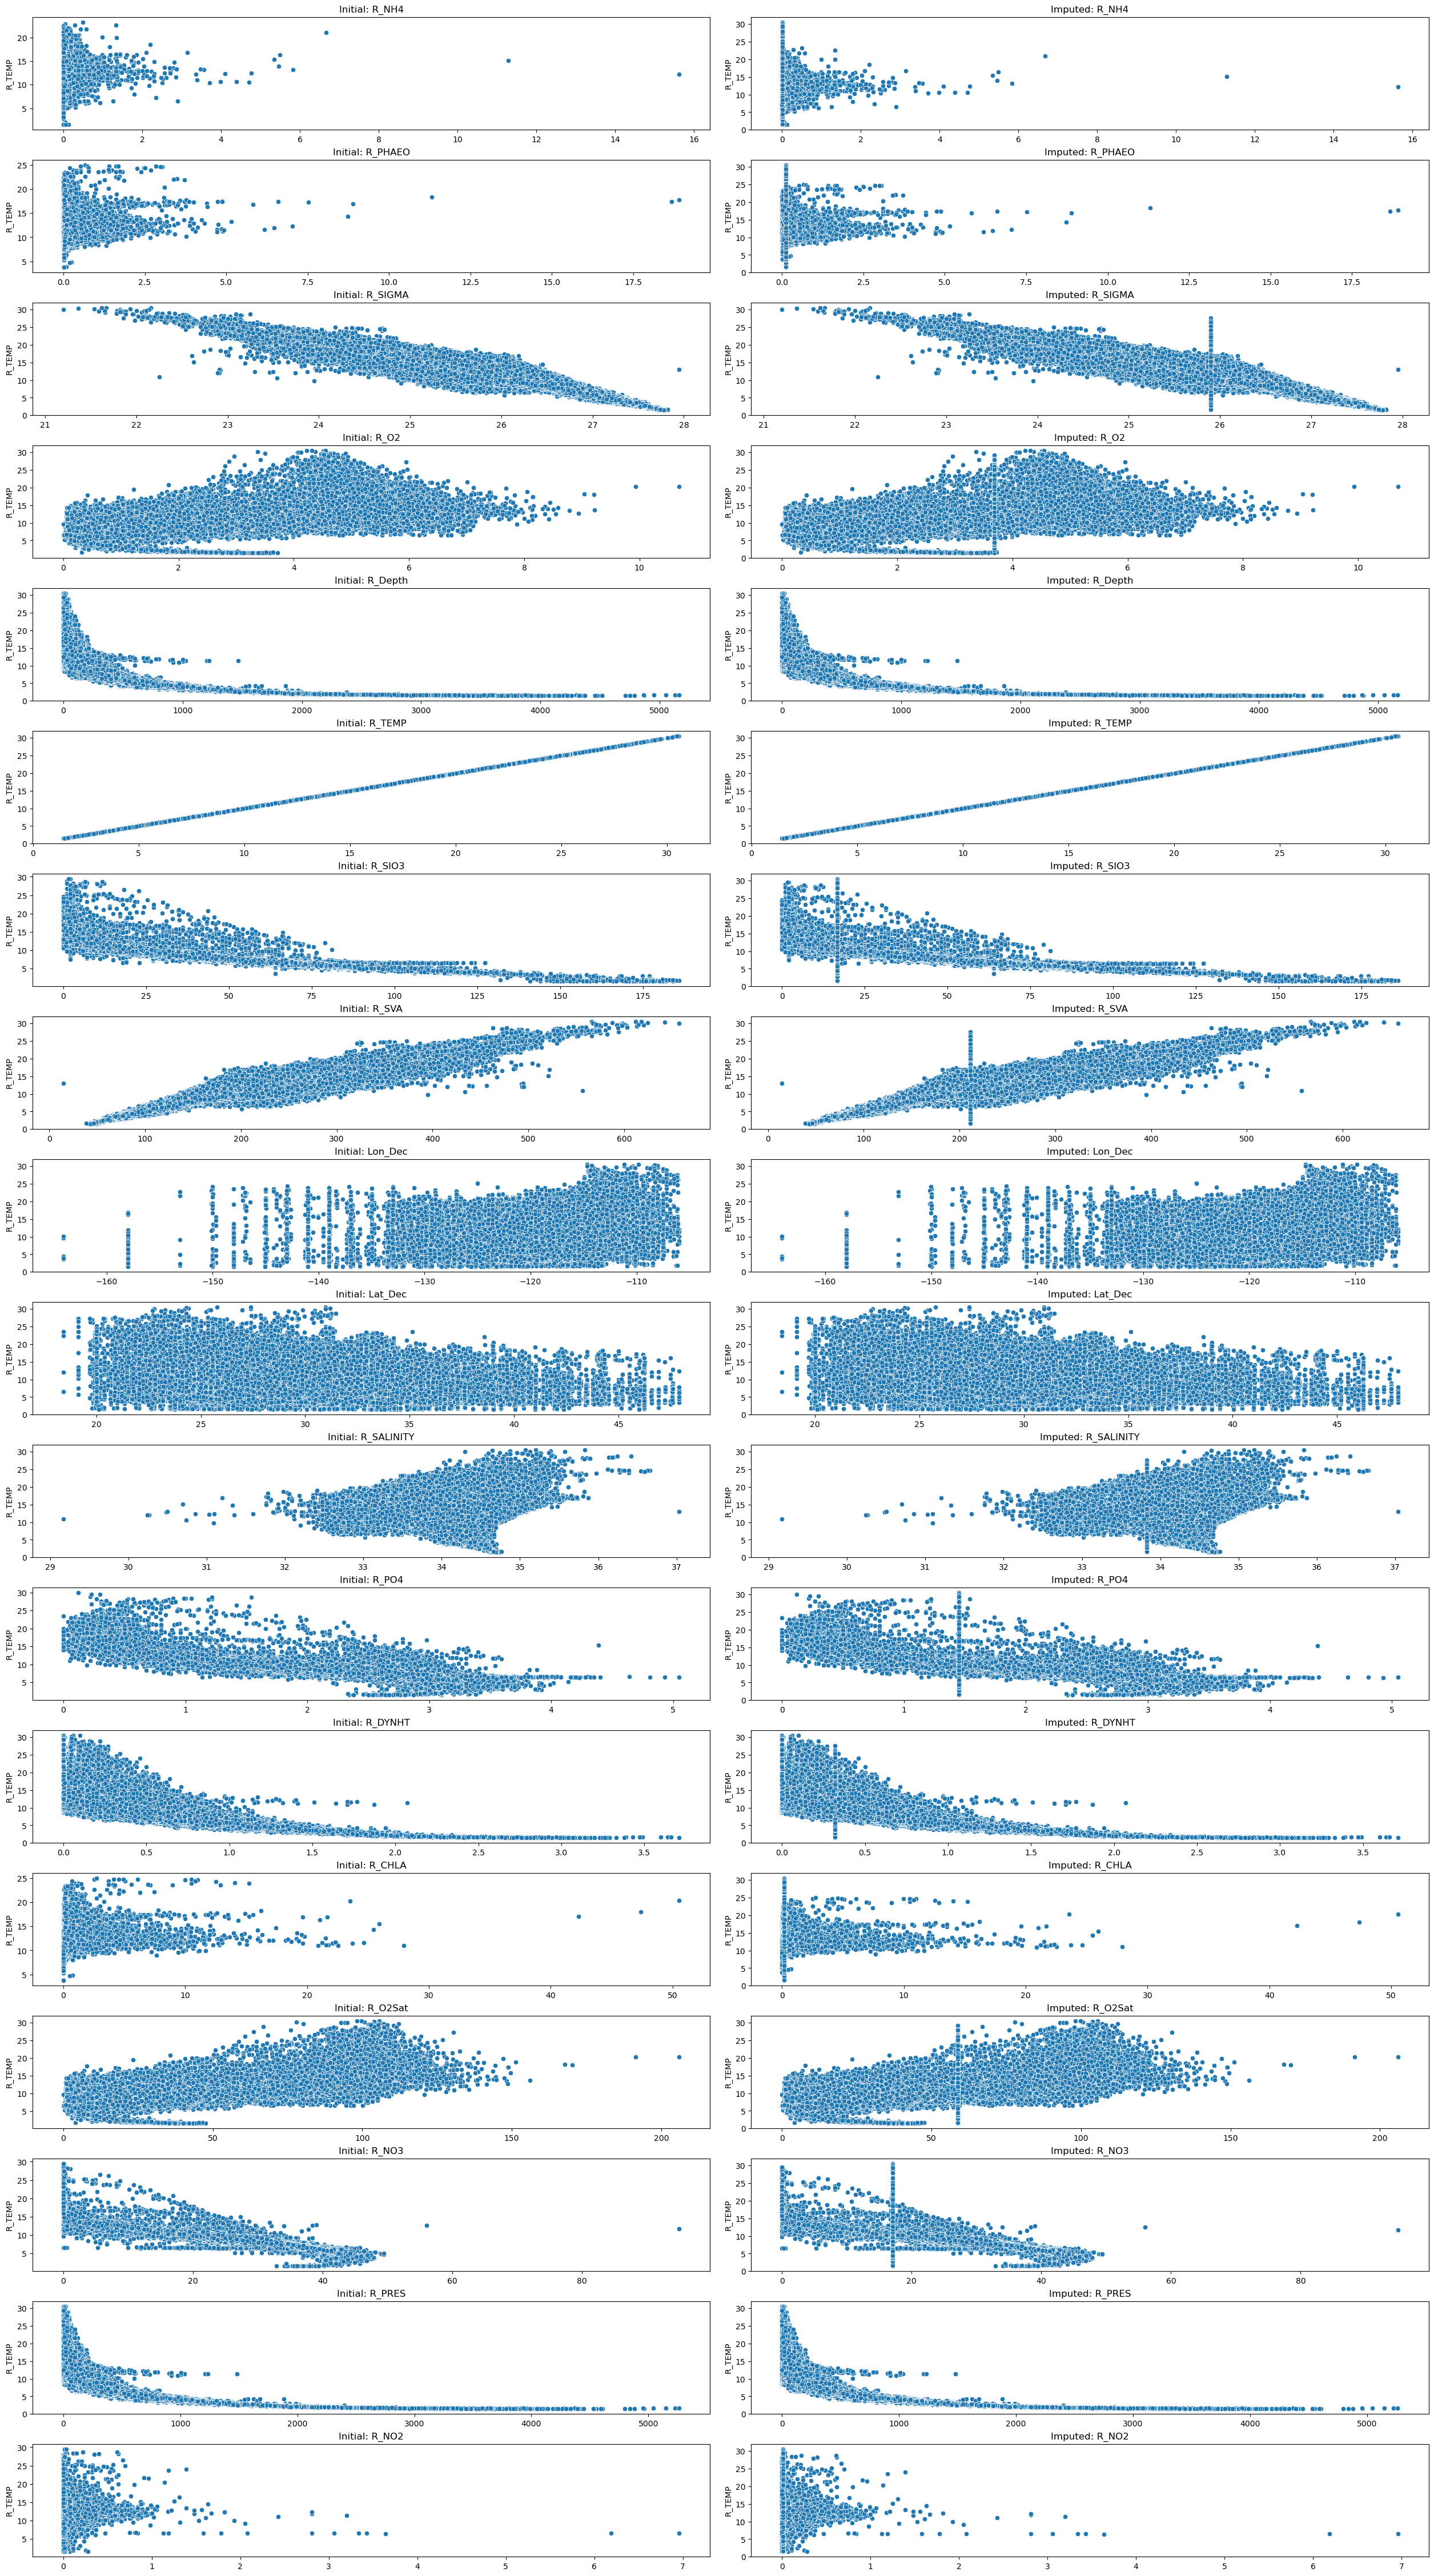

In [18]:
fig, axes = plt.subplots(nrows=test_df.shape[1], ncols=2, figsize=(25, 45), layout='constrained')
for col, ax in zip(train_df.columns, axes):
    sns.scatterplot(x=initial_test_df[col], y=initial_test_df[helpers.target_feature], ax=ax[0]).set(title=f'Initial: {col}', xlabel="")
    sns.scatterplot(x=test_df[col], y=test_df[helpers.target_feature], ax=ax[1]).set(title=f'Imputed: {col}', xlabel="")
plt.show()